In [1]:
import pandas as pd

## Import Data

In [2]:
data = pd.read_csv('MLproject/datasets/water_potability.csv')

## Basic Data Analysis

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
data.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
data.shape

(3276, 10)

In [7]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Data Preprocessing

Handling missing data

In [8]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)
clean_data = knn_imputer.fit_transform(data)
data = pd.DataFrame(clean_data, columns = data.columns)
data_copy = data.copy()

In [9]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [10]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,347.323743,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


## Machine Learning Algorithms

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# x = data.drop(columns = 'Potability')
X = data.drop('Potability', axis=1)
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,351.285226,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,347.323743,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [13]:
y = data['Potability']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Potability, dtype: float64

In [14]:
# models = [
#     ('CART', DecisionTreeClassifier()),
#     ('Gaussian Naive Bayes', GaussianNB()),
#     ('Gradient Boosting', GradientBoostingClassifier()),
#     ('KNN', KNeighborsClassifier()),
#     ('Logistic Regression', LogisticRegression()),
#     ('MLP', MLPClassifier()),
#     ('Perceptron', Perceptron()),
#     ('Random Forest', RandomForestClassifier())
# ]

# # Train and evaluate models
# accuracy_scores = []
# model_names = []

# for name, model in models:
#     model.fit(X_train, y_train)  # Train the model
#     y_pred = model.predict(X_test)  # Make predictions
#     acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
#     accuracy_percentage = acc * 100
#     accuracy_scores.append(accuracy_percentage)
#     model_names.append(name)
#     print(f'{name} Accuracy: {accuracy_percentage:.2f}%')


In [15]:
size = 0.10
seed = 123

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size, random_state=seed)


# Train and print accuracy scores for each model
# CART
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
cart_model_result = cart_model.score(X_test, y_test)
print("CART Accuracy: %.3f%%" % (cart_model_result * 100.0))

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_model_result = gnb_model.score(X_test, y_test)
print("Gaussian Naive Bayes Accuracy: %.3f%%" % (gnb_model_result * 100.0))

# Gradient Boosting (AdaBoost)
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_model_result = gb_model.score(X_test, y_test)
print("Gradient Boosting Accuracy: %.3f%%" % (gb_model_result * 100.0))

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
knn_model.fit(X_train, y_train)
knn_model_result = knn_model.score(X_test, y_test)
print("KNN Accuracy: %.3f%%" % (knn_model_result * 100.0))

# Logistic Regression
lr_model = LogisticRegression(max_iter=200, solver='lbfgs', C=1.0)
lr_model.fit(X_train, y_train)
lr_model_result = lr_model.score(X_test, y_test)
print("Logistic Regression Accuracy: %.3f%%" % (lr_model_result * 100.0))

# MLP
mlp_model = MLPClassifier(hidden_layer_sizes=(65, 32), 
                          activation='relu', 
                          solver='adam', max_iter=200, random_state=seed)
mlp_model.fit(X_train, y_train)
mlp_model_result = mlp_model.score(X_test, y_test)
print("MLP Accuracy: %.3f%%" % (mlp_model_result * 100.0))

#Perceptron
p_model = Perceptron(max_iter=200, random_state=seed, eta0=1.0, tol=1e-3)
p_model.fit(X_train, y_train)

pmodel_result = p_model.score(X_test, y_test)
print("Perceptron Accuracy: %.3f%%" % (pmodel_result * 100.0))

#Random Forest
rfmodel = RandomForestClassifier(n_estimators=100, 
                                 random_state=seed, 
                                 max_depth=None, 
                                 min_samples_split=2, 
                                 min_samples_leaf=1)
rfmodel.fit(X_train, y_train)

rfmodel_result = rfmodel.score(X_test, y_test)
print("Random Forest Accuracy: %.3f%%" % (rfmodel_result * 100.0))



CART Accuracy: 57.317%
Gaussian Naive Bayes Accuracy: 63.415%


Gradient Boosting Accuracy: 65.854%
KNN Accuracy: 56.098%
Logistic Regression Accuracy: 61.890%
MLP Accuracy: 61.890%
Perceptron Accuracy: 37.195%
Random Forest Accuracy: 71.646%


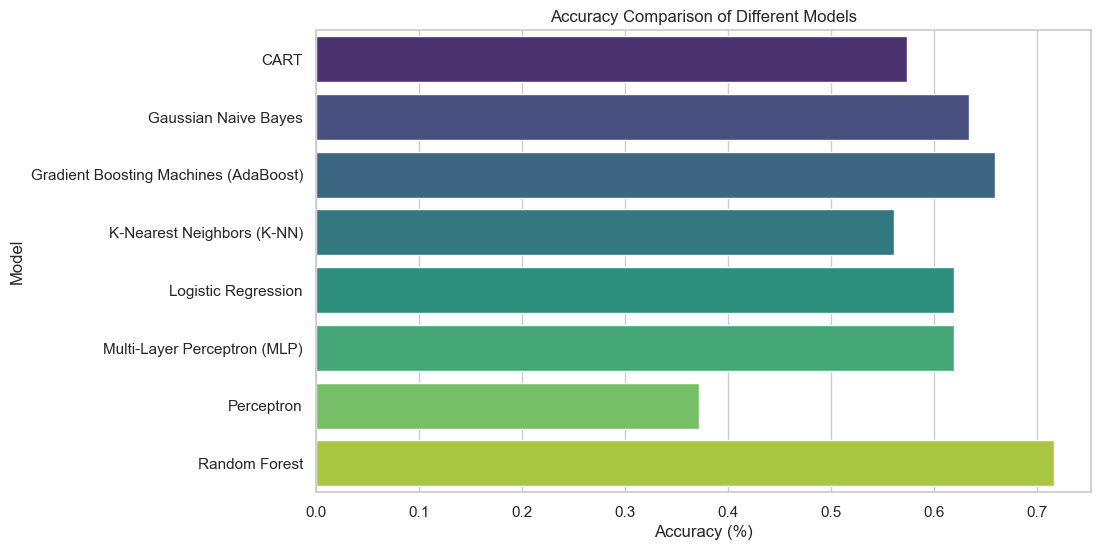

In [16]:

# List of model names
model_names = [
    "CART",
    "Gaussian Naive Bayes",
    "Gradient Boosting Machines (AdaBoost)",
    "K-Nearest Neighbors (K-NN)",
    "Logistic Regression",
    "Multi-Layer Perceptron (MLP)",
    "Perceptron",
    "Random Forest"
]

# List of accuracy scores corresponding to each model name
accuracy_scores = [
    cart_model_result,
    gnb_model_result,
    gb_model_result,
    knn_model_result,
    lr_model_result,
    mlp_model_result,
    pmodel_result,
    rfmodel_result
]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=accuracy_scores, y=model_names, hue=model_names, palette="viridis", dodge=False, legend=False)
ax.set_title('Accuracy Comparison of Different Models')
ax.set_xlabel('Accuracy (%)')
ax.set_ylabel('Model')
plt.show()

In [17]:
import joblib

In [23]:
model_filename = 'MLproject/datasets/models/rfmodel.pkl'
joblib.dump(rfmodel, model_filename)

['MLproject/datasets/models/rfmodel.pkl']

In [26]:
# Load the saved Random Forest model
loaded_model = joblib.load(model_filename)

feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
X_with_features = pd.DataFrame([[5.3, 240, 18570.39, 5.5, 397, 551.47, 16.90, 61.0, 4.0]], columns=feature_names)

# Make predictions using the loaded model
predicted_potability = loaded_model.predict(X_with_features)

# Define messages based on the predicted class
if predicted_potability == 0:
    message = "The water sample is predicted to be non-potable."
elif predicted_potability == 1:
    message = "The water sample is predicted to be potable."
else:
    message = "Invalid prediction."

print(message)

The water sample is predicted to be potable.


### Sales Data

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
salesdt = pd.read_csv('MLproject/datasets/Advertising Budget and Sales.csv')

In [3]:
salesdt.head()

,TV_Ad_Budget,Radio_Ad_Budget,Newspaper_Ad_Budget,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
salesdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TV_Ad_Budget         200 non-null    float64
 1   Radio_Ad_Budget      200 non-null    float64
 2   Newspaper_Ad_Budget  200 non-null    float64
 3   Sales                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
salesdt.isna().sum()

TV_Ad_Budget           0
Radio_Ad_Budget        0
Newspaper_Ad_Budget    0
Sales                  0
dtype: int64

In [7]:
salesdt.shape

(200, 4)

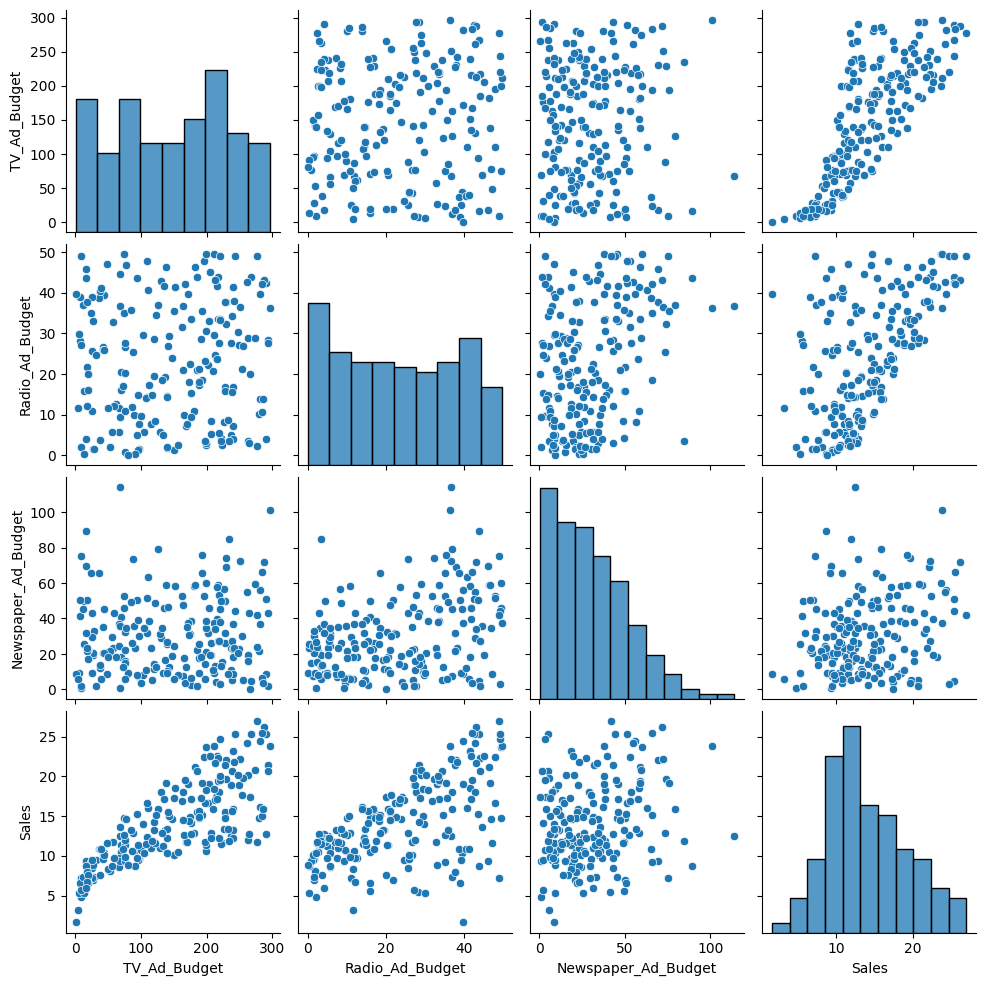

In [10]:
sns.pairplot(salesdt)

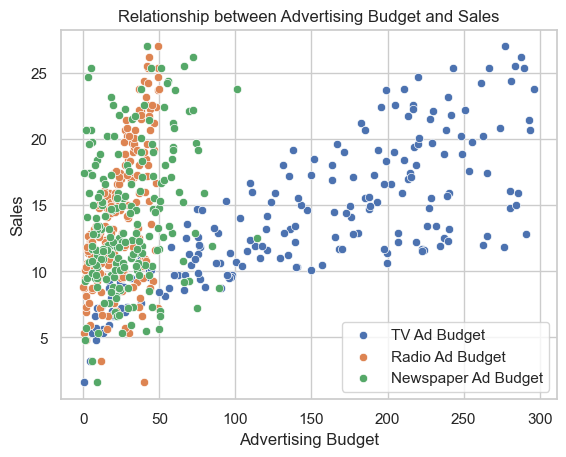

In [12]:


# Assuming you have read the data into a DataFrame named 'salesdt' using pd.read_csv
salesdt = pd.read_csv('MLproject/datasets/Advertising Budget and Sales.csv')

# Creating a scatterplot to visualize the relationship between budgets and sales
sns.set(style='whitegrid')
sns.scatterplot(x='TV_Ad_Budget', y='Sales', data=salesdt, label='TV Ad Budget')
sns.scatterplot(x='Radio_Ad_Budget', y='Sales', data=salesdt, label='Radio Ad Budget')
sns.scatterplot(x='Newspaper_Ad_Budget', y='Sales', data=salesdt, label='Newspaper Ad Budget')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Relationship between Advertising Budget and Sales')
plt.legend()
plt.show()


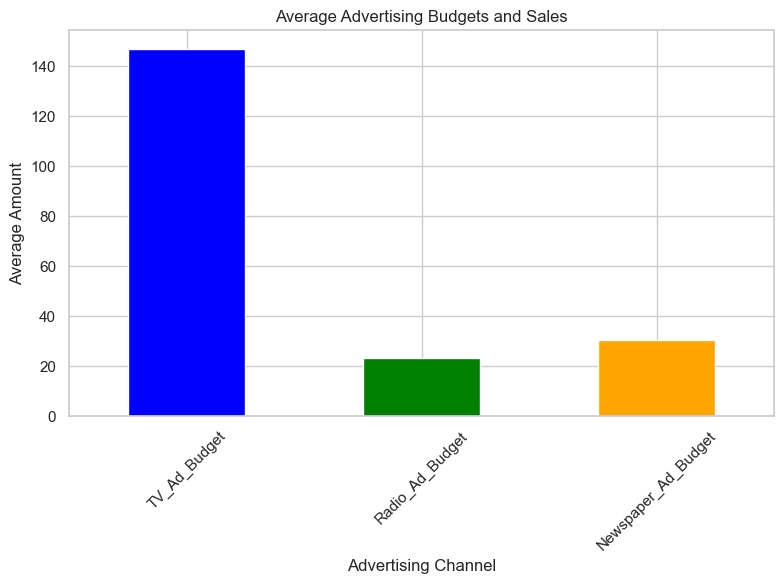

In [14]:
budget_columns = ['TV_Ad_Budget', 'Radio_Ad_Budget', 'Newspaper_Ad_Budget']
average_values = salesdt[budget_columns].mean()

plt.figure(figsize=(8, 6))

# Creating the bar plot
average_values.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])

plt.xlabel('Advertising Channel')
plt.ylabel('Average Amount')
plt.title('Average Advertising Budgets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

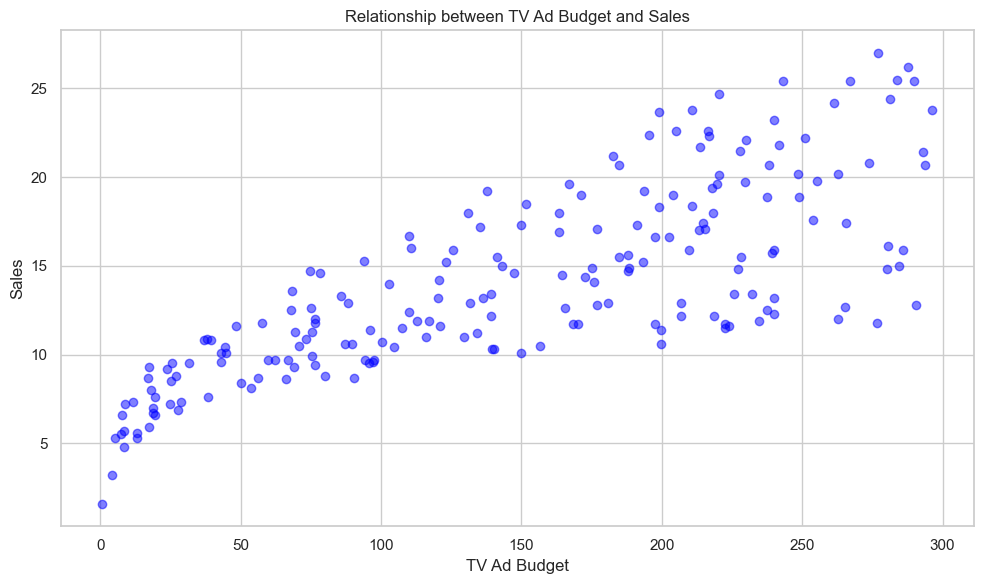

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'salesdt' is your DataFrame with the CSV data

plt.figure(figsize=(10, 6))

plt.scatter(salesdt['TV_Ad_Budget'], salesdt['Sales'], color='blue', alpha=0.5)
plt.title('Relationship between TV Ad Budget and Sales')
plt.xlabel('TV Ad Budget')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'The Regression Line Of ad Newspaper Vs Sales')

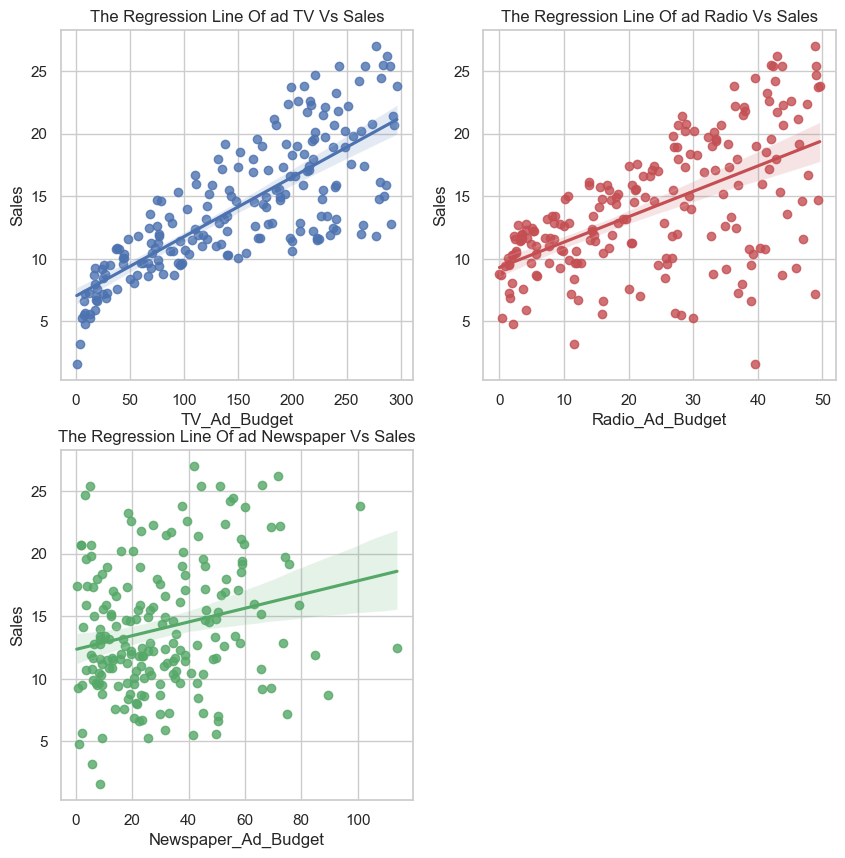

In [20]:
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=salesdt,x='TV_Ad_Budget',
            y='Sales',
            color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=salesdt,
            x='Radio_Ad_Budget',
            y='Sales',
            color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=salesdt,
            x='Newspaper_Ad_Budget',
            y='Sales',
            color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')